# Time Series Forecasting for Future Sales
---
**Submitted by: Sheetal Bongale | March 2021**

Steps -
1. Data Wrangling and Exploratory Data Analysis
2. Feature Engineering and Selection
3. **Modeling and forecasting**
4. **Model evaluation and validation**
5. **Sales quantity forecast results and visualization**
6. Final results and analysis report

In [1]:
# import libraries
import pandas as pd
import numpy as np
import math
from pandas import DataFrame
from pandas import Series
from pandas import concat
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt

pio.renderers
pio.renderers.default='notebook+jupyterlab'
plotly.offline.init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("data/top_selling_data.csv", encoding= 'unicode_escape')
df.head() 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Quarter,Month,Week,Day,Weekday,Date,Total_Sales
0,536615,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-02 10:09:00,0.29,14047.0,United Kingdom,2010,4,12,48,2,3,2010-12-02 00:00:00,13.92
1,536618,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-02 10:17:00,0.29,17017.0,United Kingdom,2010,4,12,48,2,3,2010-12-02 00:00:00,13.92
2,536830,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2880,2010-12-02 17:38:00,0.18,16754.0,United Kingdom,2010,4,12,48,2,3,2010-12-02 00:00:00,518.40
3,536839,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,288,2010-12-02 18:25:00,0.21,15093.0,United Kingdom,2010,4,12,48,2,3,2010-12-02 00:00:00,60.48
4,536856,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48,2010-12-03 10:26:00,0.29,13370.0,United Kingdom,2010,4,12,48,3,4,2010-12-03 00:00:00,13.92


In [3]:
df.shape

(672, 16)

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df1 = df.loc[df['Description']=='WORLD WAR 2 GLIDERS ASSTD DESIGNS']
df1_sales = df1.groupby(['Date'])['Quantity'].sum().reset_index()
df1_sales

,Date,Quantity
0,2010-12-02,3264
1,2010-12-03,48
2,2010-12-05,96
3,2010-12-07,48
4,2010-12-08,240
...,...,...
220,2011-12-05,205
221,2011-12-06,240
222,2011-12-07,240
223,2011-12-08,336


In [6]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
model=ARIMA(df1_sales['Quantity'],order=(1,1,0))
model_fit=model.fit()

In [7]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D.Quantity   No. Observations:                  224
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -1747.435
Method:                       css-mle   S.D. of innovations            590.862
Date:                Mon, 15 Mar 2021   AIC                           3500.870
Time:                        00:55:08   BIC                           3511.105
Sample:                             1   HQIC                          3505.002
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -9.4649     27.098     -0.349      0.727     -62.575      43.645
ar.L1.D.Quantity    -0.4592      0.063     -7.243      0.000      -0.583      -0.335
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.1778           +0.0000j            2.1778            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:>

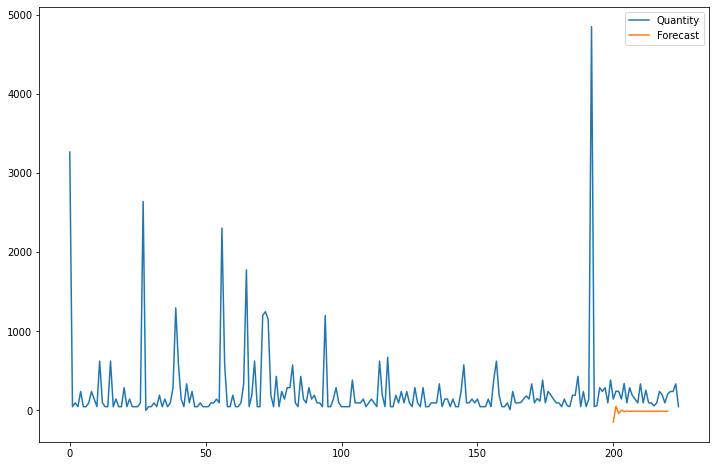

In [8]:
df1_sales['Forecast']=model_fit.predict(start=93,end=220,dynamic=True)
df1_sales[['Quantity','Forecast']].plot(figsize=(12,8))

## SARIMA Model

In [9]:
model=sm.tsa.statespace.SARIMAX(df1_sales['Quantity'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results=model.fit()

<AxesSubplot:>

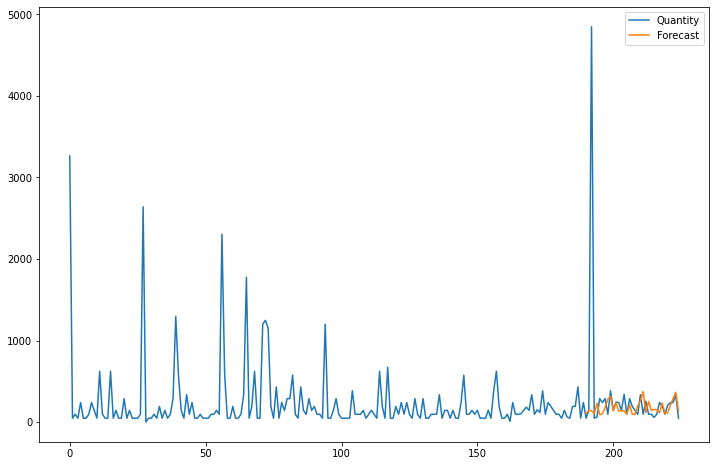

In [10]:
df1_sales['Forecast']=results.predict(start=190,end=230,dynamic=True)
df1_sales[['Quantity','Forecast']].plot(figsize=(12,8))

In [11]:
df1_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      225 non-null    datetime64[ns]
 1   Quantity  225 non-null    int64         
 2   Forecast  35 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 5.4 KB


In [12]:
df2 = df.loc[df['Description']=='MEDIUM CERAMIC TOP STORAGE JAR']
df2_sales = df1.groupby(['Date'])['Quantity'].sum().reset_index()
df2_sales

,Date,Quantity
0,2010-12-02,3264
1,2010-12-03,48
2,2010-12-05,96
3,2010-12-07,48
4,2010-12-08,240
...,...,...
220,2011-12-05,205
221,2011-12-06,240
222,2011-12-07,240
223,2011-12-08,336


In [13]:
model=sm.tsa.statespace.SARIMAX(df2_sales['Quantity'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results=model.fit()

<AxesSubplot:>

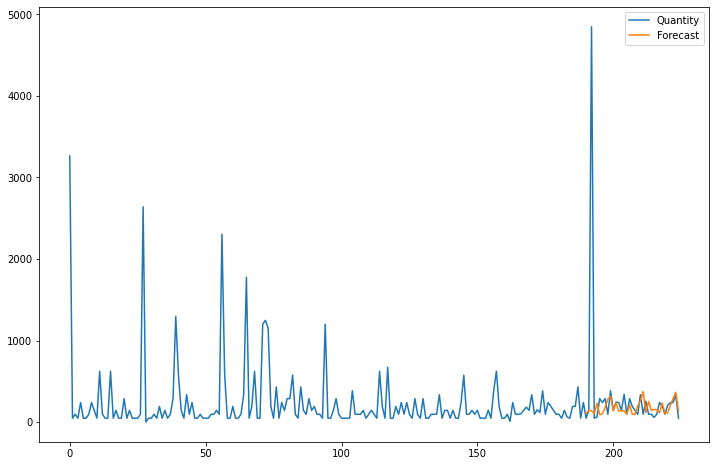

In [14]:
df2_sales['Forecast']=results.predict(start=190,end=230,dynamic=True)
df2_sales[['Quantity','Forecast']].plot(figsize=(12,8))

In [15]:
df2_sales.tail(15)

,Date,Quantity,Forecast
210,2011-11-21,336,261.294250
211,2011-11-22,96,375.462377
212,2011-11-23,257,117.322807
213,2011-11-25,96,253.067245
214,2011-11-27,96,142.001493
215,2011-11-28,58,155.955912
216,2011-11-29,96,152.030630
217,2011-11-30,240,113.674315
218,2011-12-01,198,235.048718
219,2011-12-02,96,108.048415


## Persistence Algorithm (Naïve forecast)


In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from matplotlib import pyplot

In [17]:
X = pd.Series(df2_sales['Quantity'].values, index=df2_sales['Date'])

In [18]:
train, test = X[0:-210], X[-12:]
# walk-forward validation
history = [x for x in train]
test

Date
2011-11-25     96
2011-11-27     96
2011-11-28     58
2011-11-29     96
2011-11-30    240
2011-12-01    198
2011-12-02     96
2011-12-05    205
2011-12-06    240
2011-12-07    240
2011-12-08    336
2011-12-09     48
dtype: int64

In [19]:
predictions = list()
for i in range(len(test)):
    # make prediction
    predictions.append(history[-1])
    # observation
    history.append(test[i])
predictions

[48, 96, 96, 58, 96, 240, 198, 96, 205, 240, 240, 336]

In [20]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 109.302


In [21]:
X = pd.Series(df2_sales['Quantity'].values, df2_sales['Date'])
X.values

array([3264,   48,   96,   48,  240,   48,   48,   96,  240,  144,   48,
        624,   99,   48,   48,  624,   48,  144,   48,   48,  288,   48,
        144,   48,   48,   48,   96, 2640,    1,   48,   48,   96,   48,
        192,   48,  144,   48,   96,  288, 1296,  576,  144,   48,  336,
         96,  240,   48,   48,   96,   48,   48,   48,   96,   96,  144,
         96, 2304,  576,   48,   48,  192,   48,   48,   96,  336, 1776,
         48,  192,  624,   48,   48, 1200, 1248, 1152,  192,   48,  432,
         48,  240,  144,  288,  288,  576,   96,   48,  432,  144,   96,
        288,  144,  192,   96,   96,   48, 1200,   48,   48,  144,  288,
         96,   48,   48,   48,   48,  384,   96,   96,   96,  144,   48,
         96,  144,   96,   48,  624,  192,   48,  672,   48,   48,  192,
         96,  240,   96,  240,   96,   48,  288,   96,   48,  288,   48,
         48,   96,   96,   96,  336,   48,  144,  144,   48,  144,   48,
         48,  240,  576,   96,   96,  144,   96,  1

In [22]:
# Create lagged dataset
from pandas import DataFrame
from pandas import concat
values = DataFrame(X.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))

      t-1   t+1
0     NaN  3264
1  3264.0    48
2    48.0    96
3    96.0    48
4    48.0   240


In [23]:
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [24]:
# persistence model
def model_persistence(x):
    return x
 
# walk-forward validation
predictions = list()
for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
 

Test MSE: 610201.896


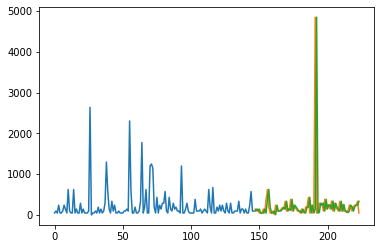

In [25]:
# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

## LSTM Model Development

In [29]:
from pandas import DataFrame
from pandas import Series
from pandas import concat
from pandas import read_csv
from pandas import datetime
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy


# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# create a differenced series
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)

# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]

# scale train and test data to [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

# fit an LSTM network to training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model

# make a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

In [36]:
train

array([[3.264e+03, 4.800e+01],
       [4.800e+01, 9.600e+01],
       [9.600e+01, 4.800e+01],
       [4.800e+01, 2.400e+02],
       [2.400e+02, 4.800e+01],
       [4.800e+01, 4.800e+01],
       [4.800e+01, 9.600e+01],
       [9.600e+01, 2.400e+02],
       [2.400e+02, 1.440e+02],
       [1.440e+02, 4.800e+01],
       [4.800e+01, 6.240e+02],
       [6.240e+02, 9.900e+01],
       [9.900e+01, 4.800e+01],
       [4.800e+01, 4.800e+01],
       [4.800e+01, 6.240e+02],
       [6.240e+02, 4.800e+01],
       [4.800e+01, 1.440e+02],
       [1.440e+02, 4.800e+01],
       [4.800e+01, 4.800e+01],
       [4.800e+01, 2.880e+02],
       [2.880e+02, 4.800e+01],
       [4.800e+01, 1.440e+02],
       [1.440e+02, 4.800e+01],
       [4.800e+01, 4.800e+01],
       [4.800e+01, 4.800e+01],
       [4.800e+01, 9.600e+01],
       [9.600e+01, 2.640e+03],
       [2.640e+03, 1.000e+00],
       [1.000e+00, 4.800e+01],
       [4.800e+01, 4.800e+01],
       [4.800e+01, 9.600e+01],
       [9.600e+01, 4.800e+01],
       [

In [ ]:
# # transform scale
# X = dataframe.values

# scaler = MinMaxScaler(feature_range=(-1, 1))
# scaler = scaler.fit(X)
# scaled_X = scaler.transform(X)
# scaled_series = Series(scaled_X[:, 0])
# print(scaled_series.head())
# # invert transform
# inverted_X = scaler.inverse_transform(scaled_X)
# inverted_series = Series(inverted_X[:, 0])
# print(inverted_series.head())

In [ ]:
X = dataframe.values

train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]

# transform the scale of the data
scaler, train_scaled, test_scaled = scale(train, test)

# fit the model
lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
# forecast the entire training dataset to build up state for forecasting
train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
lstm_model.predict(train_reshaped, batch_size=1)

# walk-forward validation on the test data
predictions = list()
for i in range(len(test_scaled)):
    # make one-step forecast
    X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
    yhat = forecast_lstm(lstm_model, 1, X)
    # invert scaling
    yhat = invert_scale(scaler, X, yhat)
    # invert differencing
    yhat = inverse_difference(X, yhat, len(test_scaled)+1-i)
    # store forecast
    predictions.append(yhat)
    
    print('Month=%d, Predicted=%f' % (i+1, yhat))

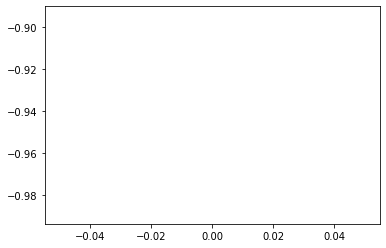

In [41]:
# report performance
#rmse = sqrt(mean_squared_error(X[-12:], predictions))
#print('Test RMSE: %.3f' % rmse)
# line plot of observed vs predicted
pyplot.plot(X[-12:])
pyplot.plot(predictions)
pyplot.show()

In [46]:

plot_data = [
    go.Scatter(
        x=df1_sales['Date'],
        y=df1_sales['Quantity'],
    )
]
plot_layout = go.Layout(
        title='Daily Sales'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
fig.show()